In [ ]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.decomposition import TruncatedSVD


def reduction_dim(dict_lex, n_components=4):
    dict_lex_reduced = {}
    for k, v in dict_lex.items():
        svd = TruncatedSVD(n_components=n_components)
        svd.fit(np.array([e[1] for e in v]))
        dict_lex_reduced[k] = [(e[0], svd.transform([e[1]])[0]) for e in v]
    return dict_lex_reduced


def plot_clusters(liste_lex, kmeans):
    plt.figure(figsize=(20, 20))
    for i in range(10):
        plt.scatter(
            [e[1][0] for e in liste_lex if kmeans.predict([e[1]])[0] == i],
            [e[1][1] for e in liste_lex if kmeans.predict([e[1]])[0] == i],
            label=f"Cluster {i}",
        )
    plt.legend()
    plt.savefig("imgs/cluster_lex.png")
    plt.show()





with open("collection_textes.pickle", mode="rb") as f:
    collection_textes = pickle.load(f)

N_COMPONENTS = 2


In [ ]:
allecarts = [e.ecarts for e in collection_textes]
alllex = [e.lexicalites for e in collection_textes]

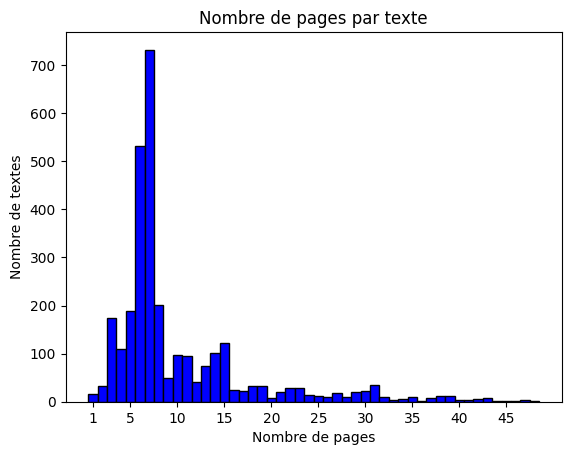

In [ ]:
stat = [len(e) for e in allecarts if len(e) < 50]
stat1 = [len(e) for e in alllex if len(e) < 50]
# plt.hist(stat, bins=50, range=(0, 50), color="blue", edgecolor="black")
plt.hist(stat1, bins=np.arange(1, 50) - 0.5, range=(0, 50), color="blue", edgecolor="black")
plt.xticks([1] + list(range(0, 50, 5)[1:]))
plt.figsize = (20, 20)
plt.xlabel("Nombre de pages")
plt.ylabel("Nombre de textes")
plt.title("Nombre de pages par texte")
plt.savefig("imgs/histo_nb_pages.png")
plt.show()


In [ ]:
dict_lex = {taile: [] for taile in range(1000)}
for i, lex in enumerate(alllex):
    dict_lex[len(lex)].append((i, lex))

dict_lex = {k: v for k, v in dict_lex.items() if v}

# _ = [print(k, len(v)) for k, v in dict_lex.items()]


In [ ]:
dict_ecarts = {taile: [] for taile in range(1000)}
for i, ecart in enumerate(allecarts):
    dict_ecarts[len(ecart)].append((i, ecart))

dict_ecarts = {k: v for k, v in dict_ecarts.items() if v}

# _ = [print(k, len(v)) for k, v in dict_ecarts.items()]

In [ ]:
# dict_lex_sub_40 = {k: v for k, v in dict_lex.items() if k < 40}
# dict_lex_sup_2 = {k: v for k, v in dict_lex.items() if k > 2}
dict_lex_sup_n_sub = {k: v for k, v in dict_lex.items() if N_COMPONENTS < k < 80}
dict_ecarts_sup_n_sub = {k: v for k, v in dict_ecarts.items() if N_COMPONENTS < k < 80}


In [ ]:
dict_lex_reduced = reduction_dim(dict_lex_sup_n_sub, n_components=N_COMPONENTS)
dict_ecarts_reduced = reduction_dim(dict_ecarts_sup_n_sub, n_components=N_COMPONENTS)


/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_tru

In [ ]:
liste_lex = [e for v in dict_lex_reduced.values() for e in v if len(e[1]) == 2]
liste_ecarts = [e for v in dict_ecarts_reduced.values() for e in v if len(e[1]) == 2]


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(np.array([e[1] for e in liste_lex]))
kmeans2 = KMeans(n_clusters=10, random_state=0).fit(np.array([e[1] for e in liste_ecarts]))

aff = AffinityPropagation().fit(np.array([e[1] for e in liste_lex]))
aff2 = AffinityPropagation().fit(np.array([e[1] for e in liste_ecarts]))

agg = AgglomerativeClustering(n_clusters=10).fit(np.array([e[1] for e in liste_lex]))
agg2 = AgglomerativeClustering(n_clusters=10).fit(np.array([e[1] for e in liste_ecarts]))

spec = SpectralClustering(n_clusters=10).fit(np.array([e[1] for e in liste_lex]))
spec2 = SpectralClustering(n_clusters=10).fit(np.array([e[1] for e in liste_ecarts]))



/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenera

kmeans.cluster_centers_



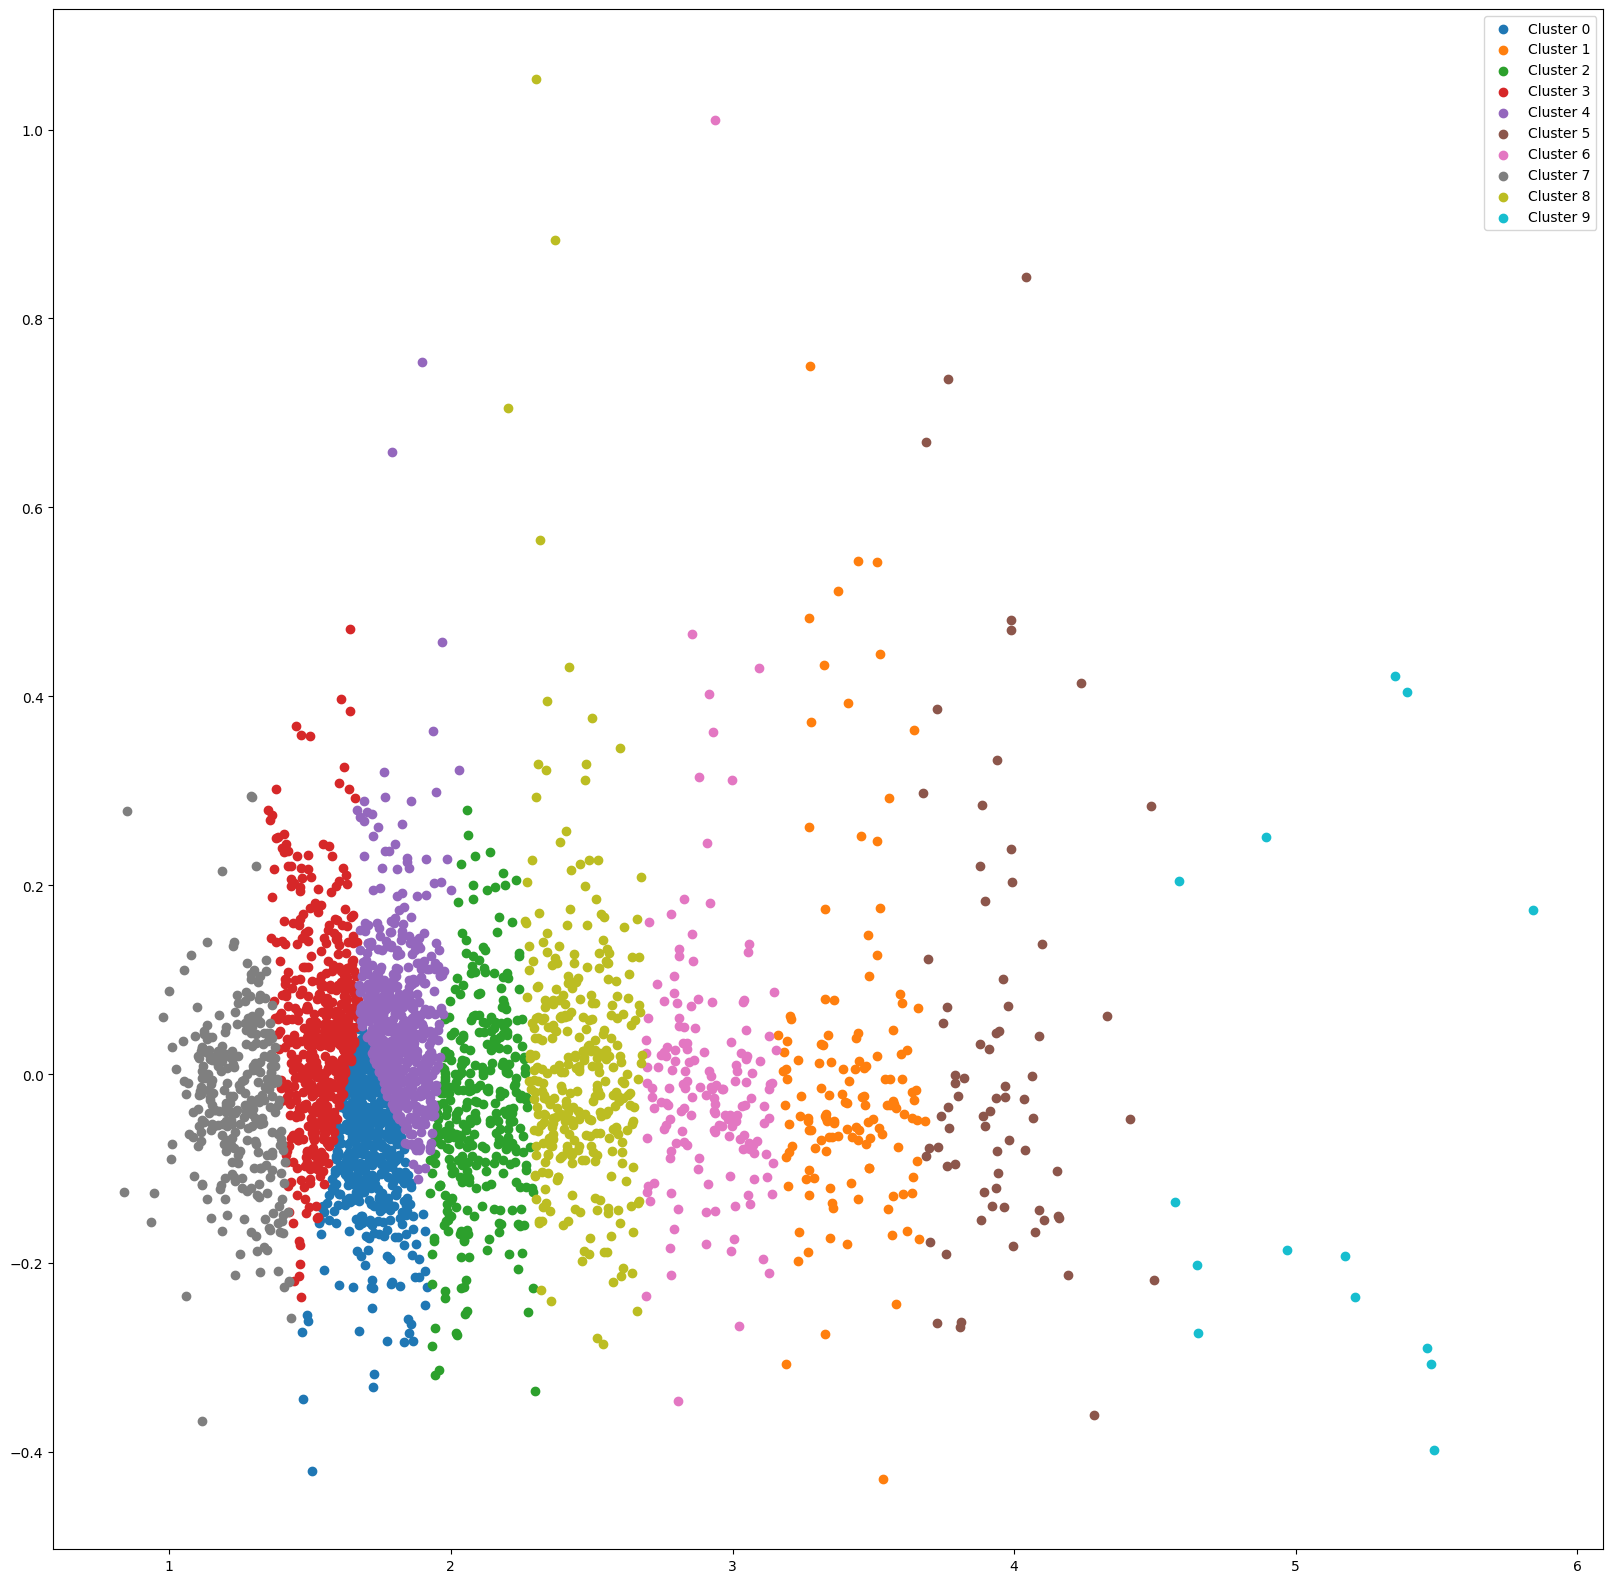

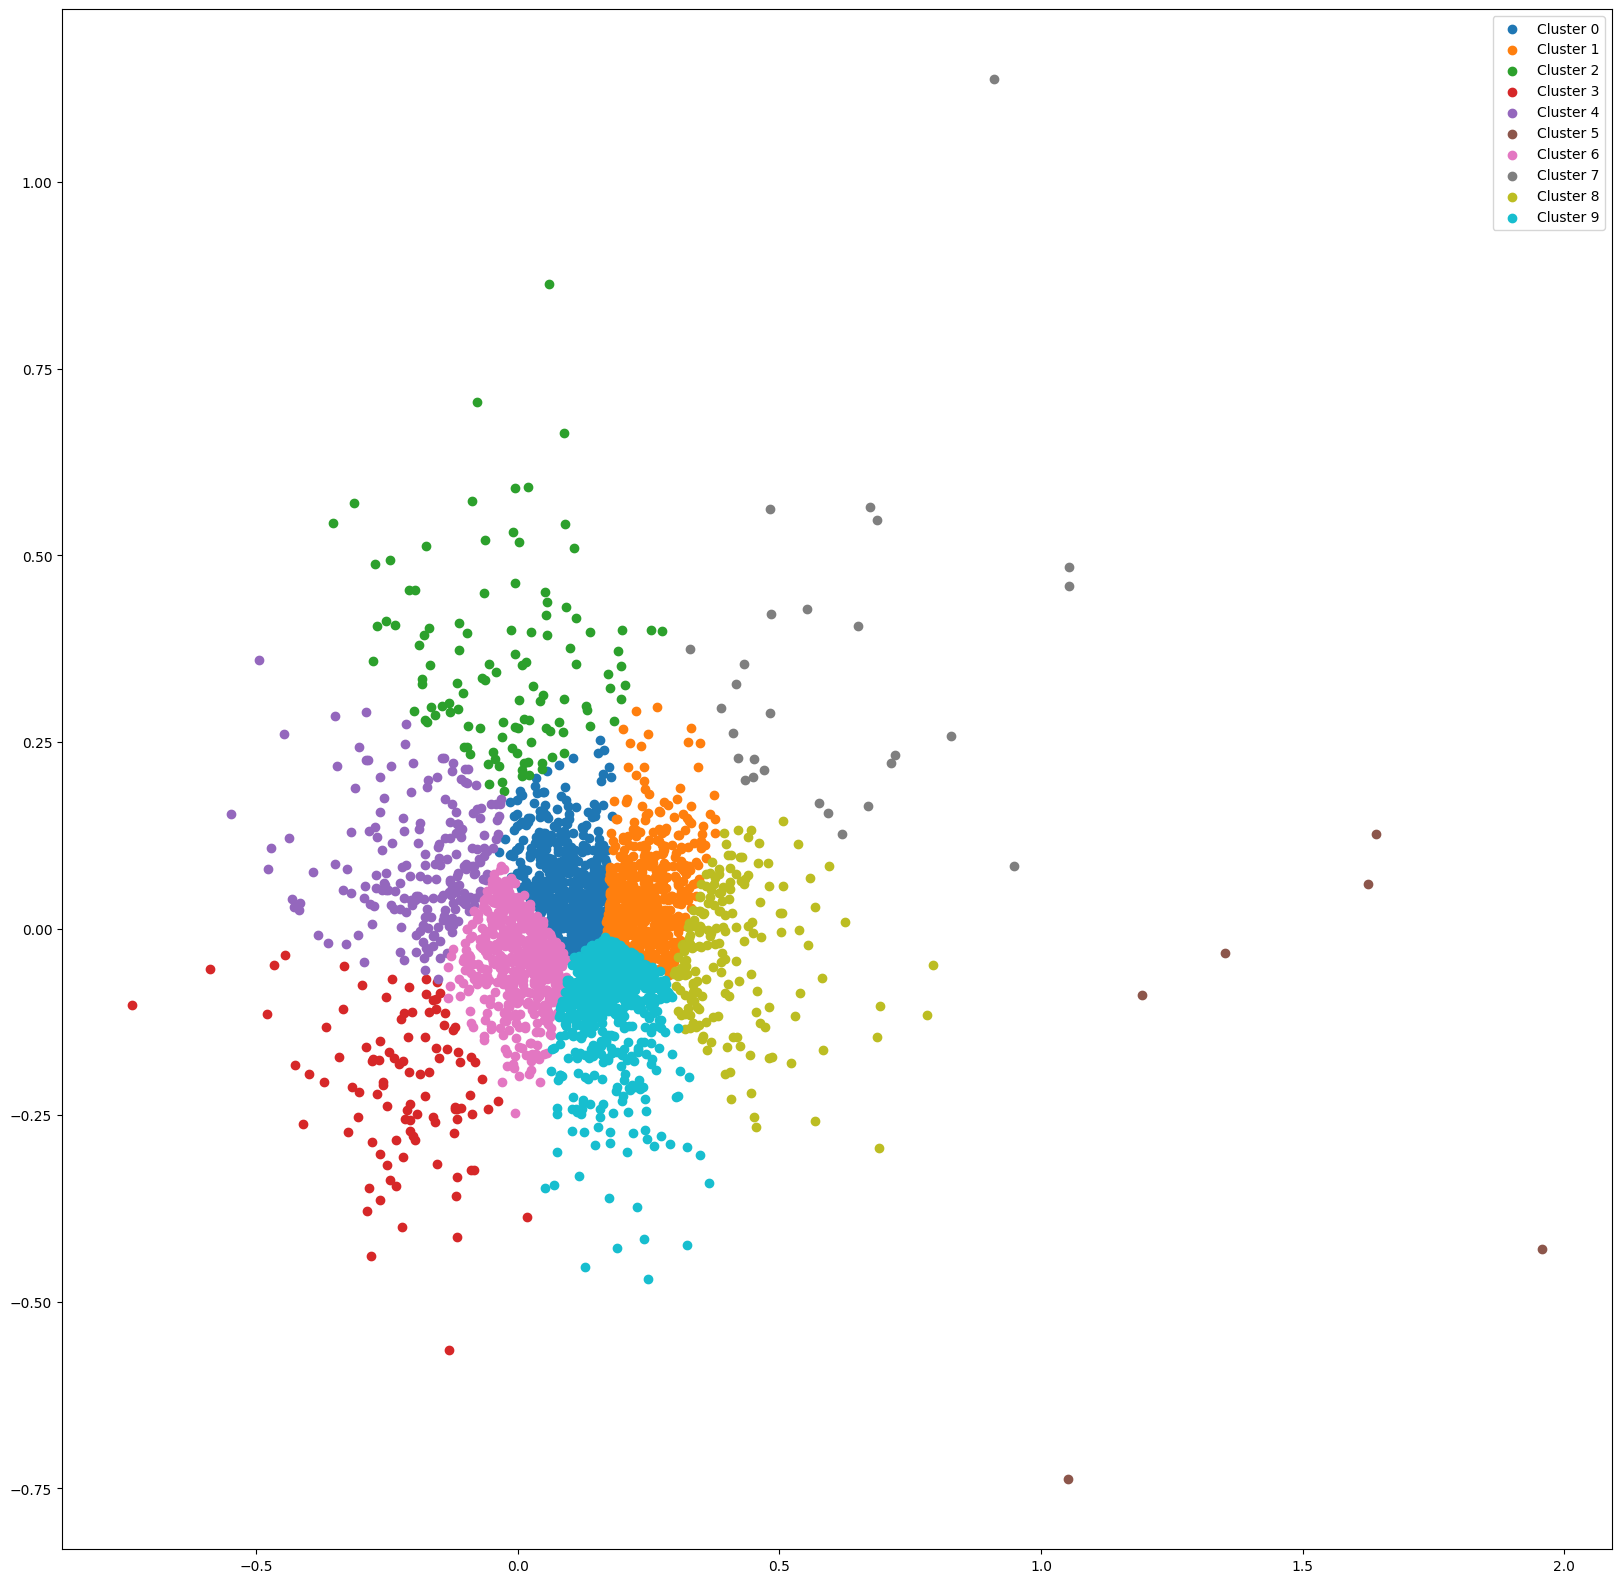

KeyboardInterrupt: 

<Figure size 2000x2000 with 0 Axes>

In [11]:
plot_clusters(liste_lex, kmeans)
plot_clusters(liste_ecarts, kmeans2)

plot_clusters(liste_lex, aff)
plot_clusters(liste_ecarts, aff2)

plot_clusters(liste_lex, agg)
plot_clusters(liste_ecarts, agg2)

plot_clusters(liste_lex, spec)
plot_clusters(liste_ecarts, spec2)


